<a href="https://colab.research.google.com/github/DitaAnatasya/google_colab/blob/main/UAS_CLUSTERING_Dita_Anatasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLUSTERING
#menggunakan algoritma K-MEANS
Dita Anatasya 2008107010060

##Exploratory Data Analysis

In [ ]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
#membaca dataset berbentuk csv
data = pd.read_csv("data-sale-customers.csv")

#menampilkan 5 data teratas
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#menampilkan 5 data terbawah
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
#melihat jumlah baris dan kolom
data.shape

(440, 8)

##K-MEANS

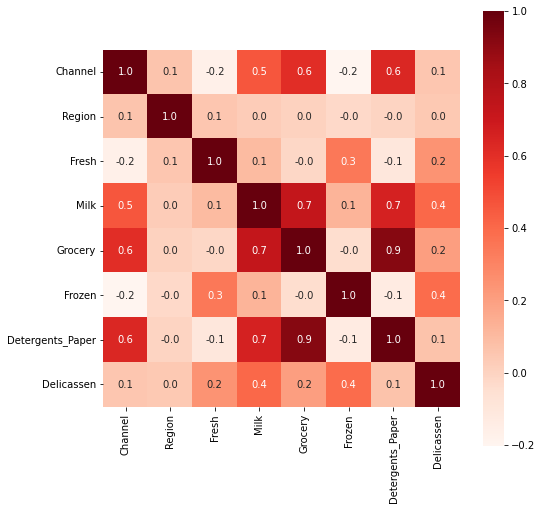

In [ ]:
# Menggunakan heatmap untuk mencari korelasi antara variabel
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,
            cbar=True,
            square=True,
            fmt=".1f",
            annot=True,
            cmap="Reds")

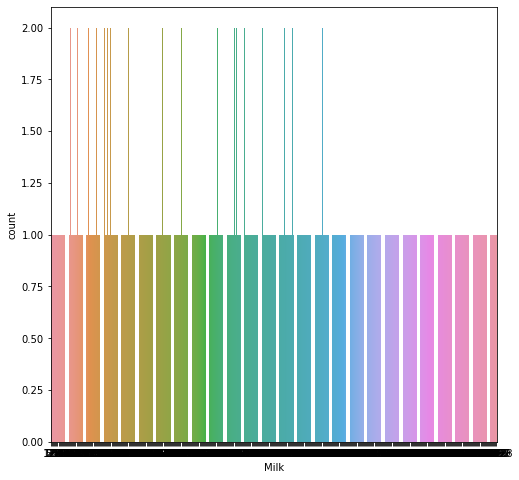

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Milk", data=data)

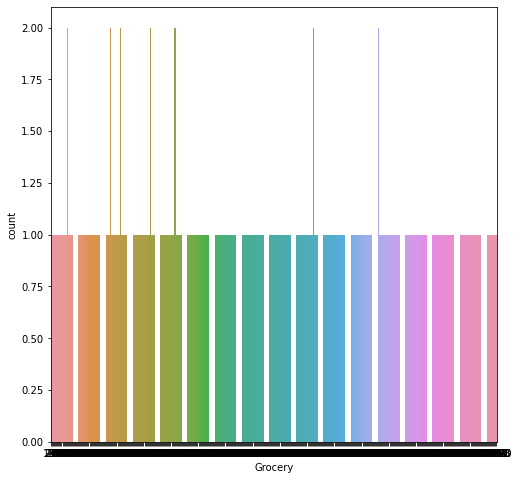

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Grocery", data=data)

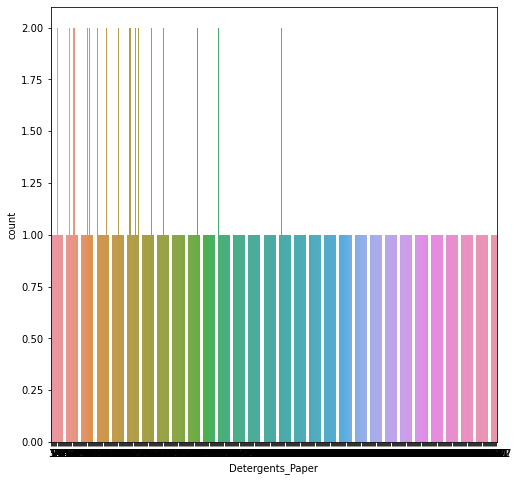

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Detergents_Paper", data=data)

##clusters

In [ ]:
X = data.iloc[:,[3, 4, 6]].values
X

array([[ 9656,  7561,  2674],
       [ 9810,  9568,  3293],
       [ 8808,  7684,  3516],
       ...,
       [15488, 30243, 14841],
       [ 1981,  2232,   168],
       [ 1698,  2510,   477]])

In [ ]:
 wcss = []
 for i in range (1, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)
wcss

[73537990586.0409,
 36022107386.97455,
 22164388373.045643,
 16367855554.16746,
 13692843625.005287,
 12180633521.70517,
 9643274706.80751,
 8632020286.59068,
 7308510147.243488,
 6335188750.716358]

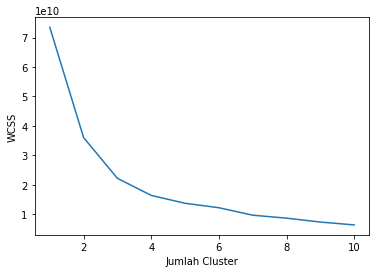

In [ ]:
sns.set
plt.plot(range(1, 11), wcss)
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.show()

##building the model

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [ ]:
y=kmeans.fit_predict(X)

In [ ]:
X[y==0,2]

array([2674, 3293, 3516,  507, 1777, 1795, 3140, 3321, 1716,  549,  964,
        370, 2767, 2518, 2259,  375, 2381, 4003,  242,  100, 1107, 2134,
        820,  918,  361,  483, 4239,  862,  212, 1145, 2575, 4618, 5121,
        609, 1538, 2587,  204, 2024,  227, 3084, 4095, 4074, 1247, 3468,
        788,  656,  116, 1321,  764, 1901,    3,  529,  301, 1202,  610,
        550, 3837, 1579,  165,  454,   69,  627,   71,  223, 3874,   54,
         56,  215, 4573, 1480, 1491,  139, 6830, 2505,  169,  483,  585,
        118,  276,  310,  319,  411,  266,  174,  264,   25, 1976,  500,
        778,  349, 2386, 1062,  410,  395,   70,  955,  256,   47,  199,
       2447,  721,  249,  637,  960,   51,   20,  399,  516,   73, 1082,
        283,  113,  170,  255,  352,  302,    7,  811, 4004, 4424,    3,
        232, 3674, 4973, 1680,   79,   69, 2840,  153, 1532,   20,  120,
        273, 1382,  334,   58,  949, 3459,  118,   43,  187,  355,  330,
        763, 4314,  592,  402,  284,  954,    5,  2

## Visualizing The Cluster

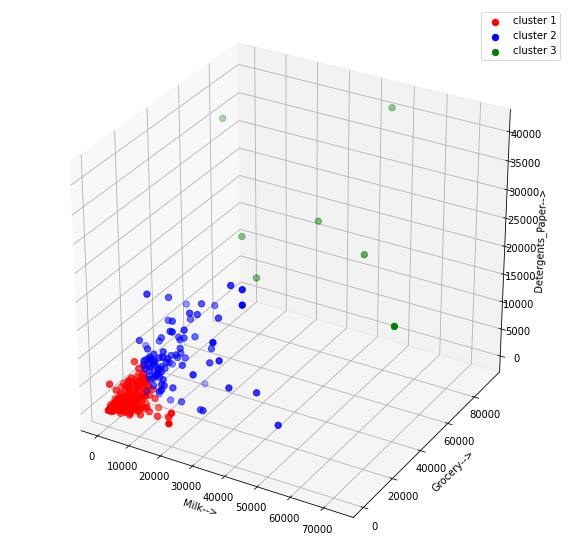

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0], X[y == 0,1], X[y == 0,2], s=40, color='red', label="cluster 1")
ax.scatter(X[y == 1,0], X[y == 1,1], X[y == 1,2], s=40, color='blue', label="cluster 2")
ax.scatter(X[y == 2,0], X[y == 2,1], X[y == 2,2], s=40, color='green', label="cluster 3")
ax.set_xlabel("Milk-->")
ax.set_ylabel("Grocery-->")
ax.set_zlabel("Detergents_Paper-->")
ax.legend()
plt.show()